In [1]:
from utils.result import *
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from scipy.io import loadmat
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

%reload_ext autoreload
%autoreload 2
# stimuli = ['0-BEA', '0-BOL', '0-Ctl', '1-DatExt', '0-FAR', '0-GER', '0-ISO', '0-LIN', 
#            '0-M2', '0-M3', '0-M4', '0-M5', '0-M6', '0-MAL', '0-MYR', '0-NER', 
#            '1-P3', '1-P4', '1-P5', '1-P9', '1-P9_Hund', '1-P9_Ten', '1-P9_TenThous']

stimuli = ['0-BEA', '0-BOL', '0-Ctl', '0-FAR', '0-GER', '0-ISO', 
           '0-LIN', '0-M2', '0-M3', '0-M4', '0-M5', '0-M6', 
           '0-MAL', '0-MYR', '0-NER', 
           '1-P9_TenThous', '1-DatExt', '1-P3', '1-P4', '1-P5', '1-P9', '1-P9_Hund', '1-P9_Ten']		

mixture_dict = {"1-P9":["0-BEA","0-BOL","0-MAL","0-MYR","0-LIN","0-NER","0-GER","0-ISO","0-FAR"],
                "1-P5":["0-BEA","0-BOL","0-LIN","0-NER","0-GER"],
                "1-P4":["0-BEA","0-BOL","0-LIN","0-NER"],
                "1-P3":["0-BEA","0-BOL","0-LIN"],
                "0-M6":["0-MAL","0-MYR","0-NER","0-GER","0-ISO","0-FAR"],
                "0-M5":["0-MAL","0-MYR","0-GER","0-ISO","0-FAR"],
                "0-M4":["0-MAL","0-MYR","0-ISO","0-FAR"],
                "0-M3":["0-MAL","0-ISO","0-FAR"],
                "0-M2":["0-BEA","0-BOL"]}


palette = {"1-DatExt":"013220", "0-Ctl":"CA1F7B", "1-P9":"8DB600", \
"1-P5":"7BA05B", "1-P4":"568203", "1-P3":"004225", "0-M6":"FF1DCE", \
"0-M5":"CA1F7B", "0-M4":"FF0090", "0-M3":"F653A6", "0-M2":"D0417E",\
"0-BOL":"9F4576", "0-BEA":"E30B5C", "0-FAR":"FF33CC", "0-GER":"FF66CC",\
"0-NER":"FC0FC0", "0-LIN":"FF6FFF", "0-MAL":"CF71AF", "0-MYR":"CF3476",\
"0-ISO": "DE5D83","1-P9_Hund":"1E4D2B", "1-P9_TenThous":"00563B", "1-P9_Ten":"03C03C"}


/hpc/home/pc266/.local/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


shuffle = True; shuffle = False

['S1U1', 'S1U2', 'S1U3', 'S1U4', 'S2U1', 'S2U2', 'S3U1', 'S3U2', 'S3U3', 'S3U4', 'S4U1', 'S4U2', 'S4U3', 'S4U4']
['S1U1', 'S1U2', 'S1U3', 'S1U4', 'S2U1', 'S2U2', 'S3U1', 'S3U2', 'S3U3', 'S3U4', 'S4U1', 'S4U2', 'S4U3', 'S4U4']
['S1U1', 'S1U2', 'S1U3', 'S1U4', 'S2U1', 'S2U2', 'S3U1', 'S3U2', 'S3U3', 'S3U4', 'S4U1', 'S4U2', 'S4U3', 'S4U4']
['S1U1', 'S1U2', 'S1U3', 'S1U4', 'S2U1', 'S2U2', 'S3U1', 'S3U2', 'S3U3', 'S3U4', 'S4U1', 'S4U2', 'S4U3', 'S4U4']
['S1U1', 'S1U2', 'S1U3', 'S1U4', 'S2U1', 'S2U2', 'S3U1', 'S3U2', 'S3U3', 'S3U4', 'S4U1', 'S4U2', 'S4U3', 'S4U4']
['S1U1', 'S1U2', 'S1U3', 'S1U4', 'S2U1', 'S2U2', 'S3U1', 'S3U2', 'S3U3', 'S3U4', 'S4U1', 'S4U2', 'S4U3', 'S4U4']
['S1U1', 'S1U2', 'S1U3', 'S1U4', 'S2U1', 'S2U2', 'S3U1', 'S3U2', 'S3U3', 'S3U4', 'S4U1', 'S4U2', 'S4U3', 'S4U4']
['S1U1', 'S1U2', 'S1U3', 'S1U4', 'S2U1', 'S2U2', 'S3U1', 'S3U2', 'S3U3', 'S3U4', 'S4U1', 'S4U2', 'S4U3', 'S4U4']
['S1U1', 'S1U2', 'S1U3', 'S1U4', 'S2U1', 'S2U2', 'S3U1', 'S3U2', 'S3U3', 'S3U4', 'S4U1', 'S4U2',

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7fa9df663940>
Traceback (most recent call last):
  File "/hpc/group/tarokhlab/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/hpc/group/tarokhlab/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/hpc/group/tarokhlab/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/hpc/group/tarokhlab/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'


Text(0.5, 1.0, '070921')

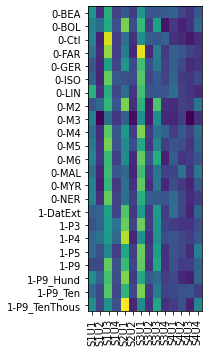

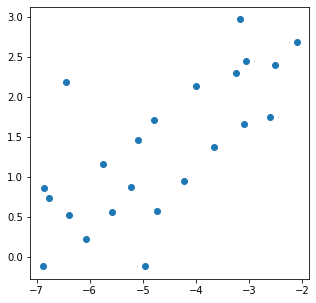

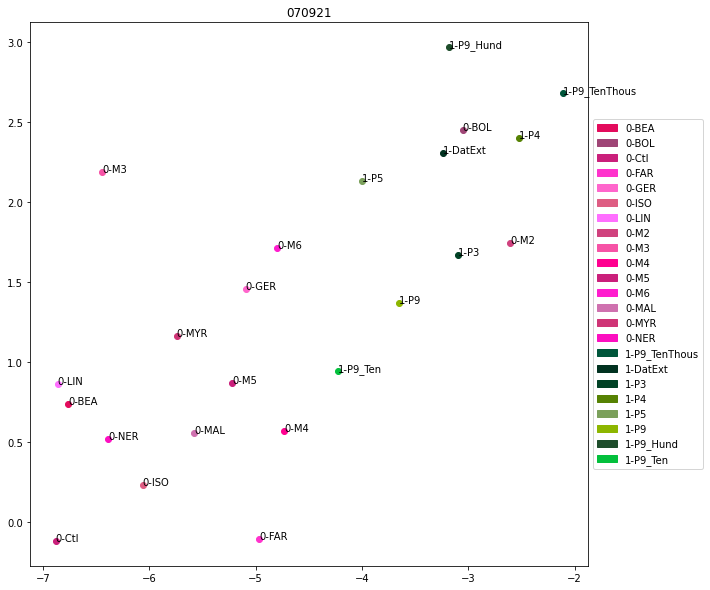

In [2]:
perplex = 14
early_exagg = 1



# dur_spa_attcond_stim_ensemble_average = []

# for target in range(0,14):
#     spa_attcond_betai, _, spa_attcond_ensemble, _, neurons = analyze_betai(yaml_filepath="config/070921/sparse-attflow/sparse-attflow-{}.yaml".format(target),
#                                                                                cond=True,shuffle = 1,\
#                                                                                 panyu = "/hpc/home/pc266/data/ALdata/070921_cleaned.csv")
#     dur_spa_attcond_stim_ensemble_average.append(spa_attcond_ensemble)

# plot_ensemble([np.mean(dur_spa_attcond_stim_ensemble_average,0)], 
#               ["Cond-spa-attflow"], 
#               "ALL",
#               q_labels=stimuli,
#               neurons=neurons,
#               section="During")
# #plt.savefig("betai_condflow.pdf", bbox_inches="tight")



# #########SHUFFLE = TRUE#########

# # mean_stim_beta = np.array(dur_spa_attcond_stim_ensemble_average).mean(0).mean(0)
# mean_stim_beta = np.array(dur_spa_attcond_stim_ensemble_average).mean(0).mean(0)

# mean_stim_beta_dict = {}
# tsne = TSNE(n_components=2, perplexity=perplex,early_exaggeration=early_exagg)
# a = tsne.fit_transform(mean_stim_beta)
# fig, ax = plt.subplots(figsize=(5,5))
# ax.scatter(a[:,0], a[:,1])
# for i in range(0, len(a)):
#     if "1" in stimuli[i]:
#         ax.annotate(stimuli[i], (a[i,0], a[i,1]))
# ax.set_title("070921")
# # plt.savefig("plot/2dTSNE_betai_070921.pdf", bbox_inches="tight")




# fig, ax = plt.subplots(figsize=(10,10))

# palette = {"1-DATEXT":"013220", "0-CTL":"CA1F7B", "1-P9":"8DB600", \
# "1-P5":"7BA05B", "1-P4":"568203", "1-P3":"004225", "0-M6":"FF1DCE", \
# "0-M5":"CA1F7B", "0-M4":"FF0090", "0-M3":"F653A6", "0-M2":"D0417E",\
# "0-BOL":"9F4576", "0-BEA":"E30B5C", "0-FAR":"FF33CC", "0-GER":"FF66CC",\
# "0-NER":"FC0FC0", "0-LIN":"FF6FFF", "0-MAL":"CF71AF", "0-MYR":"CF3476",\
# "0-ISO": "DE5D83","1-P9_HUND":"1E4D2B", "0-P9_THOUS":"00563B", "1-P9_TEN":"03C03C"}

# for i in range(0, len(a)):
#     ax.scatter(a[i,0], a[i,1], c=f"#{palette[stimuli[i]]}")
#     ax.annotate(stimuli[i], (a[i,0], a[i,1]))

# #set color bar according to palette
# handles = [mpatches.Patch(color=f"#{palette[stimuli[i]]}", label=stimuli[i]) for i in range(0, len(stimuli))]
# #set location of color bar at outside the image box, right next to the image
# plt.legend(handles=handles, loc='center left', bbox_to_anchor=(1, 0.5))
# ax.set_title("070921")
# # plt.savefig("plot/2dTSNE_betai_070921.pdf", bbox_inches="tight")
















#########SHUFFLE = FALSE#########


dur_spa_attcond_stim_ensemble_average = []

for target in range(0,14):
    spa_attcond_betai, _, spa_attcond_ensemble, _, neurons = analyze_betai(yaml_filepath="config/070921/sparse-attflow/sparse-attflow-{}.yaml".format(target),
                                                                               cond=True,shuffle = 0,\
                                                                                panyu = "/hpc/home/pc266/data/ALdata/070921_cleaned.csv",\
                                                                                    prefix = "/hpc/home/pc266/AL_generative")
    print(neurons)
    dur_spa_attcond_stim_ensemble_average.append(spa_attcond_ensemble)

plot_ensemble([np.mean(dur_spa_attcond_stim_ensemble_average,0)], 
              ["Cond-spa-attflow"], 
              "ALL",
              q_labels=stimuli,
              neurons=neurons,
              section="During")
#plt.savefig("betai_condflow.pdf", bbox_inches="tight")

# mean_stim_beta = np.array(dur_spa_attcond_stim_ensemble_average).mean(0).mean(0)
mean_stim_beta = np.array(dur_spa_attcond_stim_ensemble_average).mean(0).mean(0)

mean_stim_beta_dict = {}
tsne = TSNE(n_components=2, perplexity=perplex,early_exaggeration=early_exagg)
a = tsne.fit_transform(mean_stim_beta)
fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(a[:,0], a[:,1])

# for i in range(0, len(a)):
#     if "1" in stimuli[i]:
#         ax.annotate(stimuli[i], (a[i,0], a[i,1]))
# ax.set_title("070921")
# plt.savefig("plot/2dTSNE_betai_070921.pdf", bbox_inches="tight")



fig, ax = plt.subplots(figsize=(10,10))

palette = {"1-DatExt":"013220", "0-Ctl":"CA1F7B", "1-P9":"8DB600", \
"1-P5":"7BA05B", "1-P4":"568203", "1-P3":"004225", "0-M6":"FF1DCE", \
"0-M5":"CA1F7B", "0-M4":"FF0090", "0-M3":"F653A6", "0-M2":"D0417E",\
"0-BOL":"9F4576", "0-BEA":"E30B5C", "0-FAR":"FF33CC", "0-GER":"FF66CC",\
"0-NER":"FC0FC0", "0-LIN":"FF6FFF", "0-MAL":"CF71AF", "0-MYR":"CF3476",\
"0-ISO": "DE5D83","1-P9_Hund":"1E4D2B", "1-P9_TenThous":"00563B", "1-P9_Ten":"03C03C"}

for i in range(0, len(a)):
    ax.scatter(a[i,0], a[i,1], c=f"#{palette[stimuli[i]]}")
    ax.annotate(stimuli[i], (a[i,0], a[i,1]))

#set color bar according to palette
handles = [mpatches.Patch(color=f"#{palette[stimuli[i]]}", label=stimuli[i]) for i in range(0, len(stimuli))]
#set location of color bar at outside the image box, right next to the image
plt.legend(handles=handles, loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_title("070921")
# plt.savefig("plot/2dTSNE_betai_070921.pdf", bbox_inches="tight")

savepath:  result_shuffle/070921_cleaned/sparse-attflow/sparse-attflow-S1U1-cond_stim/run_0
savepath:  result_shuffle/070921_cleaned/sparse-attflow/sparse-attflow-S1U1-cond_stim/run_1
savepath:  result_shuffle/070921_cleaned/sparse-attflow/sparse-attflow-S1U1-cond_stim/run_2
savepath:  result_shuffle/070921_cleaned/sparse-attflow/sparse-attflow-S1U1-cond_stim/run_3
savepath:  result_shuffle/070921_cleaned/sparse-attflow/sparse-attflow-S1U1-cond_stim/run_4
savepath:  result_shuffle/070921_cleaned/sparse-attflow/sparse-attflow-S1U2-cond_stim/run_0
savepath:  result_shuffle/070921_cleaned/sparse-attflow/sparse-attflow-S1U2-cond_stim/run_1
savepath:  result_shuffle/070921_cleaned/sparse-attflow/sparse-attflow-S1U2-cond_stim/run_2
savepath:  result_shuffle/070921_cleaned/sparse-attflow/sparse-attflow-S1U2-cond_stim/run_3
savepath:  result_shuffle/070921_cleaned/sparse-attflow/sparse-attflow-S1U2-cond_stim/run_4
savepath:  result_shuffle/070921_cleaned/sparse-attflow/sparse-attflow-S1U3-cond

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f44676201f0>
Traceback (most recent call last):
  File "/hpc/group/tarokhlab/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/hpc/group/tarokhlab/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/hpc/group/tarokhlab/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/hpc/group/tarokhlab/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'


Text(0.5, 1.0, '070921')

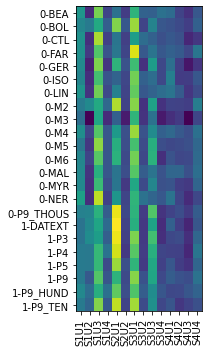

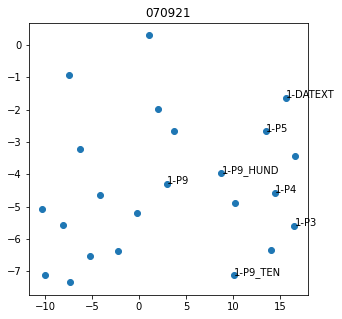

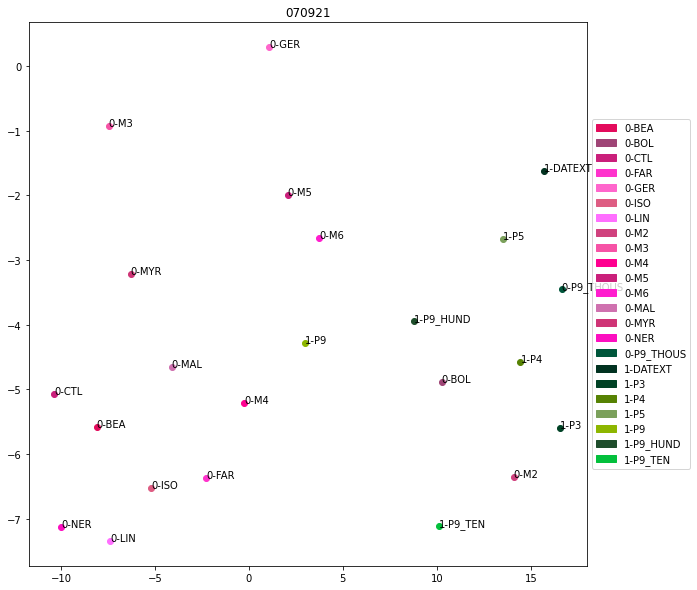

In [13]:
PN_dur_spa_attcond_stim_ensemble_average = []
LN_dur_spa_attcond_stim_ensemble_average = []
PN, LN = [],[]
for target in range(0,14):
    spa_attcond_betai, _, spa_attcond_ensemble, _, neurons = analyze_betai(yaml_filepath="config/070921/sparse-attflow/sparse-attflow-{}.yaml".format(target),
                                                                               cond=True, addtype=True)
    if neurons[target][-2:] == "PN":
        PN_dur_spa_attcond_stim_ensemble_average.append(spa_attcond_ensemble)
        PN.append(neurons[target])
    else:
        LN_dur_spa_attcond_stim_ensemble_average.append(spa_attcond_ensemble)
        LN.append(neurons[target])

plot_ensemble([np.mean(PN_dur_spa_attcond_stim_ensemble_average,0), np.mean(LN_dur_spa_attcond_stim_ensemble_average,0)], 
              ["PN", "LN"], 
              "ALL",
              q_labels=stimuli,
              neurons=neurons,
              section="During")
#plt.savefig("betai_condflow.pdf", bbox_inches="tight")

mean_stim_beta = np.array(PN_dur_spa_attcond_stim_ensemble_average).mean(0).mean(0)
mean_stim_beta_dict = {}
tsne = TSNE(n_components=2, perplexity=10, early_exaggeration=1)
a = tsne.fit_transform(mean_stim_beta)
fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(a[:,0], a[:,1])
for i in range(0, len(a)):
    if "1" in stimuli[i]:
        ax.annotate(stimuli[i], (a[i,0], a[i,1]))
ax.set_title("070921 PN")

mean_stim_beta = np.array(LN_dur_spa_attcond_stim_ensemble_average).mean(0).mean(0)
mean_stim_beta_dict = {}
tsne = TSNE(n_components=2, perplexity=10, early_exaggeration=1)
a = tsne.fit_transform(mean_stim_beta)
fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(a[:,0], a[:,1])
for i in range(0, len(a)):
    if "1" in stimuli[i]:
        ax.annotate(stimuli[i], (a[i,0], a[i,1]))
ax.set_title("070921 LN")
#plt.savefig("plot/2dTSNE_betai_070921.pdf", bbox_inches="tight")

In [2]:
dur_attcond_stim_ensemble_average = []
dur_spa_attcond_stim_ensemble_average = []

for target in range(0,14):
    spa_attcond_betai, _, spa_attcond_ensemble, _, neurons = analyze_betai(yaml_filepath="config/070924_1/sparse-attflow/sparse-attflow-{}.yaml".format(target),
                                                                               cond=True)
    if spa_attcond_ensemble:
        dur_spa_attcond_stim_ensemble_average.append(spa_attcond_ensemble)
    
plot_ensemble([np.mean(dur_spa_attcond_stim_ensemble_average,0)], 
              ["Cond-spa-attflow"], 
              "ALL",
              q_labels=stimuli,
              neurons=neurons,
              section="During")

mean_stim_beta = np.array(dur_spa_attcond_stim_ensemble_average).mean(0).mean(0)
tsne = TSNE(n_components=2, perplexity=7, early_exaggeration=1)
a = tsne.fit_transform(mean_stim_beta)
fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(a[:,0], a[:,1])
for i in range(0, len(a)):
    if "1" in stimuli[i]:
        ax.annotate(stimuli[i], (a[i,0], a[i,1]))
    
ax.set_title("070924_1")
#plt.savefig("plot/2dTSNE_betai_070924_1.pdf", bbox_inches="tight")

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (14,) + inhomogeneous part.

In [3]:
len(dur_spa_attcond_stim_ensemble_average)

14

/hpc/home/hy190/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/hpc/home/hy190/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/hpc/home/hy190/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/hpc/home/hy190/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


Text(0.5, 1.0, '070924_1 LN')

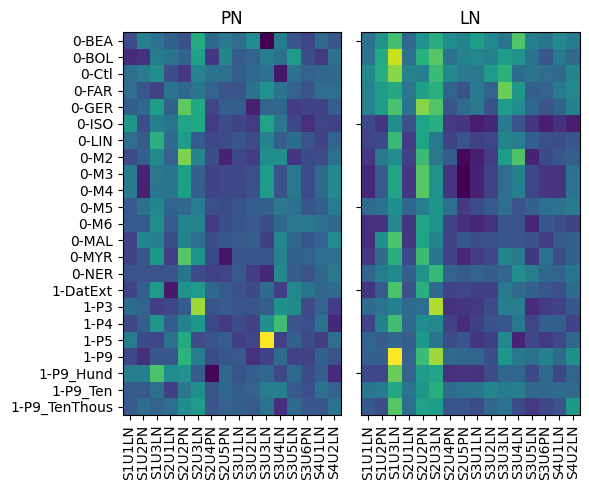

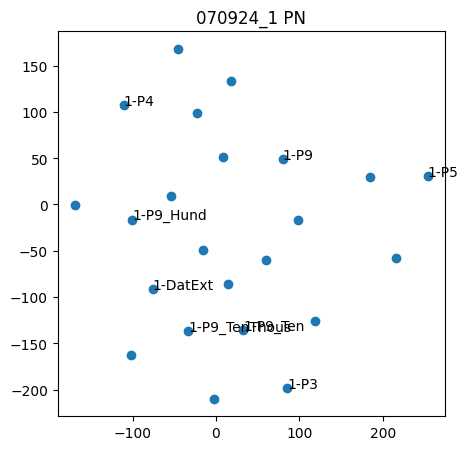

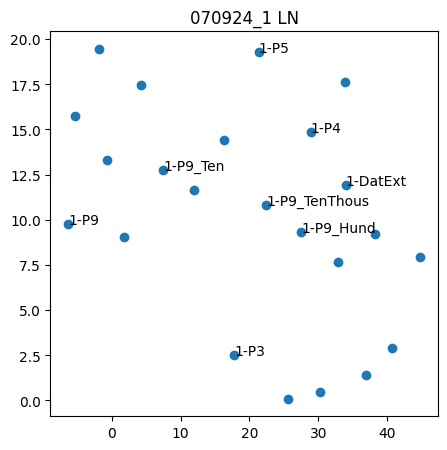

In [15]:
PN_dur_spa_attcond_stim_ensemble_average = []
LN_dur_spa_attcond_stim_ensemble_average = []
PN, LN = [],[]
for target in range(0,14):
    spa_attcond_betai, _, spa_attcond_ensemble, _, neurons = analyze_betai(yaml_filepath="config/070924_1/sparse-attflow/sparse-attflow-{}.yaml".format(target),
                                                                               cond=True, addtype=True)
    if neurons[target][-2:] == "PN":
        PN_dur_spa_attcond_stim_ensemble_average.append(spa_attcond_ensemble)
        PN.append(neurons[target])
    else:
        LN_dur_spa_attcond_stim_ensemble_average.append(spa_attcond_ensemble)
        LN.append(neurons[target])

plot_ensemble([np.mean(PN_dur_spa_attcond_stim_ensemble_average,0), np.mean(LN_dur_spa_attcond_stim_ensemble_average,0)], 
              ["PN", "LN"], 
              "ALL",
              q_labels=stimuli,
              neurons=neurons,
              section="During")
#plt.savefig("betai_condflow.pdf", bbox_inches="tight")

mean_stim_beta = np.array(PN_dur_spa_attcond_stim_ensemble_average).mean(0).mean(0)
mean_stim_beta_dict = {}
tsne = TSNE(n_components=2, perplexity=10, early_exaggeration=1)
a = tsne.fit_transform(mean_stim_beta)
fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(a[:,0], a[:,1])
for i in range(0, len(a)):
    if "1" in stimuli[i]:
        ax.annotate(stimuli[i], (a[i,0], a[i,1]))
ax.set_title("070924_1 PN")

mean_stim_beta = np.array(LN_dur_spa_attcond_stim_ensemble_average).mean(0).mean(0)
mean_stim_beta_dict = {}
tsne = TSNE(n_components=2, perplexity=10, early_exaggeration=1)
a = tsne.fit_transform(mean_stim_beta)
fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(a[:,0], a[:,1])
for i in range(0, len(a)):
    if "1" in stimuli[i]:
        ax.annotate(stimuli[i], (a[i,0], a[i,1]))
ax.set_title("070924_1 LN")
#plt.savefig("plot/2dTSNE_betai_070921.pdf", bbox_inches="tight")

/hpc/home/hy190/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/hpc/home/hy190/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


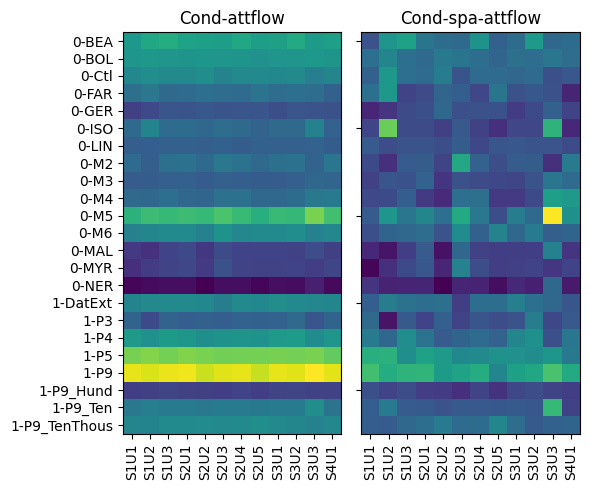

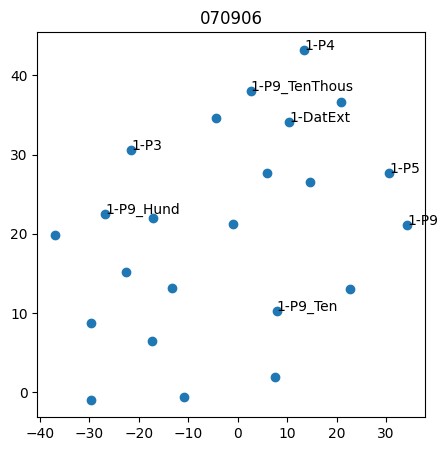

In [12]:
dur_attcond_stim_ensemble_average = []
dur_spa_attcond_stim_ensemble_average = []

for target in range(0,12):
    attcond_betai, _, attcond_ensemble, _,neurons = analyze_betai(yaml_filepath="config/070906/attflow/attflow-{}.yaml".format(target),
                                                                               cond=True)
    spa_attcond_betai, _, spa_attcond_ensemble, _,_ = analyze_betai(yaml_filepath="config/070906/sparse-attflow/sparse-attflow-{}.yaml".format(target),
                                                                               cond=True)
    
    dur_attcond_stim_ensemble_average.append(attcond_ensemble)
    dur_spa_attcond_stim_ensemble_average.append(spa_attcond_ensemble)
    
plot_ensemble([np.mean(dur_attcond_stim_ensemble_average,0), np.mean(dur_spa_attcond_stim_ensemble_average,0)], 
              ["Cond-attflow","Cond-spa-attflow"], 
              "ALL",
              q_labels=stimuli,
              neurons=neurons,
              section="During")

mean_stim_beta = np.array(dur_spa_attcond_stim_ensemble_average).mean(0).mean(0)
tsne = TSNE(n_components=2, perplexity=10, early_exaggeration=1)
a = tsne.fit_transform(mean_stim_beta)
fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(a[:,0], a[:,1])
for i in range(0, len(a)):
    if "1" in stimuli[i]:
        ax.annotate(stimuli[i], (a[i,0], a[i,1]))
ax.set_title("070906")
plt.savefig("plot/2dTSNE_betai_070906.pdf", bbox_inches="tight")
plt.show()


/hpc/home/hy190/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/hpc/home/hy190/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/hpc/home/hy190/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/hpc/home/hy190/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


Text(0.5, 1.0, '070906 LN')

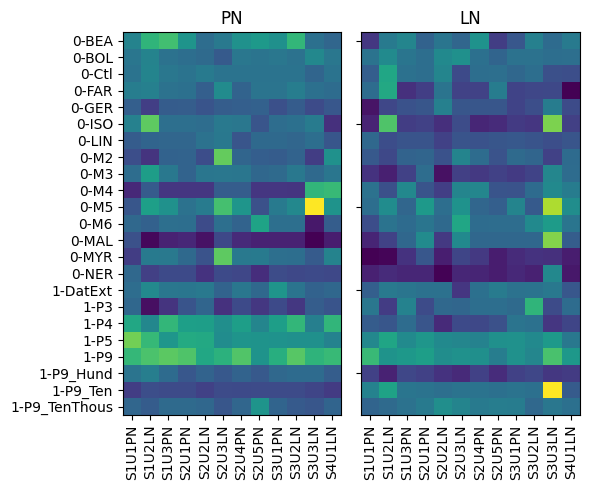

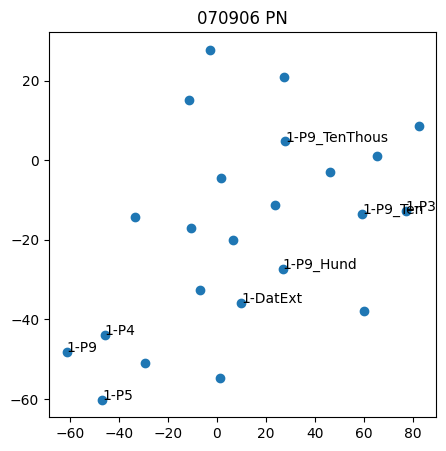

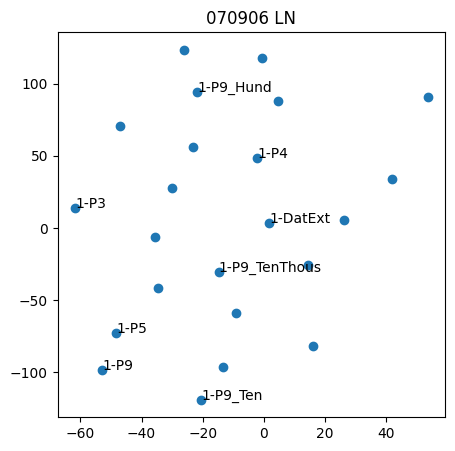

In [10]:
PN_dur_spa_attcond_stim_ensemble_average = []
LN_dur_spa_attcond_stim_ensemble_average = []
PN, LN = [],[]
for target in range(0,12):
    spa_attcond_betai, _, spa_attcond_ensemble, _, neurons = analyze_betai(yaml_filepath="config/070906/sparse-attflow/sparse-attflow-{}.yaml".format(target),
                                                                               cond=True, addtype=True)
    if neurons[target][-2:] == "PN":
        PN_dur_spa_attcond_stim_ensemble_average.append(spa_attcond_ensemble)
        PN.append(neurons[target])
    else:
        LN_dur_spa_attcond_stim_ensemble_average.append(spa_attcond_ensemble)
        LN.append(neurons[target])

plot_ensemble([np.mean(PN_dur_spa_attcond_stim_ensemble_average,0), np.mean(LN_dur_spa_attcond_stim_ensemble_average,0)], 
              ["PN", "LN"], 
              "ALL",
              q_labels=stimuli,
              neurons=neurons,
              section="During")
#plt.savefig("betai_condflow.pdf", bbox_inches="tight")

mean_stim_beta = np.array(PN_dur_spa_attcond_stim_ensemble_average).mean(0).mean(0)
mean_stim_beta_dict = {}
tsne = TSNE(n_components=2, perplexity=10, early_exaggeration=1)
a = tsne.fit_transform(mean_stim_beta)
fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(a[:,0], a[:,1])
for i in range(0, len(a)):
    if "1" in stimuli[i]:
        ax.annotate(stimuli[i], (a[i,0], a[i,1]))
ax.set_title("070906 PN")

mean_stim_beta = np.array(LN_dur_spa_attcond_stim_ensemble_average).mean(0).mean(0)
mean_stim_beta_dict = {}
tsne = TSNE(n_components=2, perplexity=10, early_exaggeration=1)
a = tsne.fit_transform(mean_stim_beta)
fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(a[:,0], a[:,1])
for i in range(0, len(a)):
    if "1" in stimuli[i]:
        ax.annotate(stimuli[i], (a[i,0], a[i,1]))
ax.set_title("070906 LN")
#plt.savefig("plot/2dTSNE_betai_070921.pdf", bbox_inches="tight")

/hpc/home/hy190/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/hpc/home/hy190/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


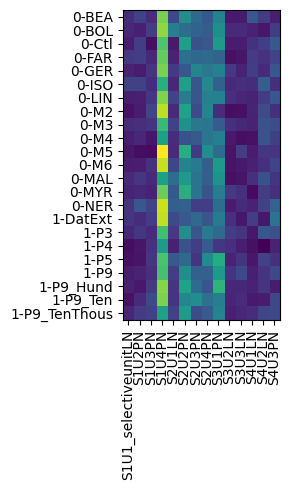

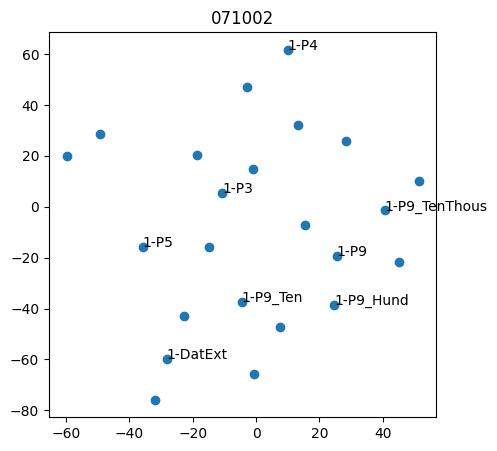

In [5]:
dur_attcond_stim_ensemble_average = []
dur_spa_attcond_stim_ensemble_average = []

for target in range(0,14):
    #att_betai, _, att_ensemble, _ = analyze_betai(yaml_filepath="config/071002/attflow/attflow-{}.yaml".format(target), 
    #                                                               cond=False)
    #spa_att_betai, _, spa_att_ensemble, _ = analyze_betai(yaml_filepath="config/071002/sparse-attflow/sparse-attflow-{}.yaml".format(target), 
    #                                                               cond=False)
    #attcond_betai, _, attcond_ensemble, _, neurons = analyze_betai(yaml_filepath="config/071002/attflow/attflow-{}.yaml".format(target),
    #                                                                           cond=True)
    spa_attcond_betai, _, spa_attcond_ensemble, _,neurons = analyze_betai(yaml_filepath="config/071002/sparse-attflow/sparse-attflow-{}.yaml".format(target),
                                                                               cond=True,addtype=True)
    
    #dur_attcond_stim_ensemble_average.append(attcond_ensemble)
    dur_spa_attcond_stim_ensemble_average.append(spa_attcond_ensemble)
    
plot_ensemble([np.mean(dur_spa_attcond_stim_ensemble_average,0)], 
              ["Cond-spa-attflow"], 
              "ALL",
              q_labels=stimuli,
              neurons=neurons,
              section="During")

mean_stim_beta = np.array(dur_spa_attcond_stim_ensemble_average).mean(0).mean(0)
tsne = TSNE(n_components=2, perplexity=7, early_exaggeration=1)
a = tsne.fit_transform(mean_stim_beta)
fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(a[:,0], a[:,1])
for i in range(0, len(a)):
    if "1" in stimuli[i]:
        ax.annotate(stimuli[i], (a[i,0], a[i,1]))
ax.set_title("071002")
plt.savefig("plot/2dTSNE_betai_071002.pdf", bbox_inches="tight")
plt.show()

/hpc/home/hy190/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/hpc/home/hy190/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/hpc/home/hy190/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/hpc/home/hy190/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


Text(0.5, 1.0, '071002 LN')

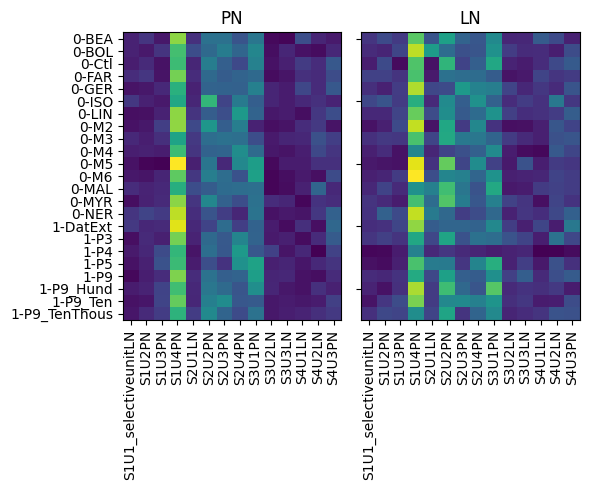

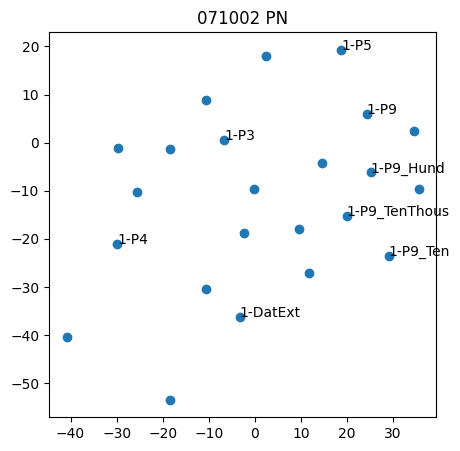

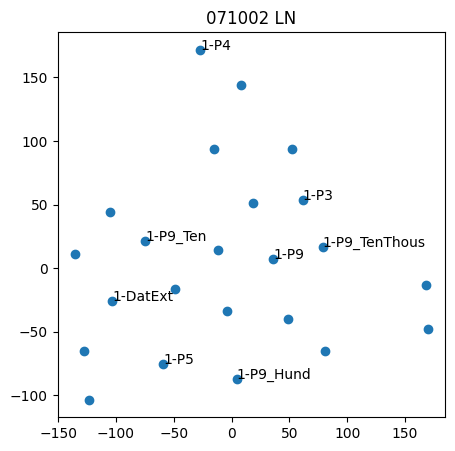

In [ ]:
PN_dur_spa_attcond_stim_ensemble_average = []
LN_dur_spa_attcond_stim_ensemble_average = []
PN, LN = [],[]
for target in range(0,14):
    spa_attcond_betai, _, spa_attcond_ensemble, _, neurons = analyze_betai(yaml_filepath="config/071002/sparse-attflow/sparse-attflow-{}.yaml".format(target),
                                                                               cond=True, addtype=True)
    if neurons[target][-2:] == "PN":
        PN_dur_spa_attcond_stim_ensemble_average.append(spa_attcond_ensemble)
        PN.append(neurons[target])
    else:
        LN_dur_spa_attcond_stim_ensemble_average.append(spa_attcond_ensemble)
        LN.append(neurons[target])

plot_ensemble([np.mean(PN_dur_spa_attcond_stim_ensemble_average,0), np.mean(LN_dur_spa_attcond_stim_ensemble_average,0)], 
              ["PN", "LN"], 
              "ALL",
              q_labels=stimuli,
              neurons=neurons,
              section="During")
#plt.savefig("betai_condflow.pdf", bbox_inches="tight")

mean_stim_beta = np.array(PN_dur_spa_attcond_stim_ensemble_average).mean(0).mean(0)
mean_stim_beta_dict = {}
tsne = TSNE(n_components=2, perplexity=10, early_exaggeration=1)
a = tsne.fit_transform(mean_stim_beta)
fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(a[:,0], a[:,1])
for i in range(0, len(a)):
    if "1" in stimuli[i]:
        ax.annotate(stimuli[i], (a[i,0], a[i,1]))
ax.set_title("071002 PN")

mean_stim_beta = np.array(LN_dur_spa_attcond_stim_ensemble_average).mean(0).mean(0)
mean_stim_beta_dict = {}
tsne = TSNE(n_components=2, perplexity=10, early_exaggeration=1)
a = tsne.fit_transform(mean_stim_beta)
fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(a[:,0], a[:,1])
for i in range(0, len(a)):
    if "1" in stimuli[i]:
        ax.annotate(stimuli[i], (a[i,0], a[i,1]))
ax.set_title("071002 LN")
#plt.savefig("plot/2dTSNE_betai_070921.pdf", bbox_inches="tight")

/hpc/home/hy190/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/hpc/home/hy190/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


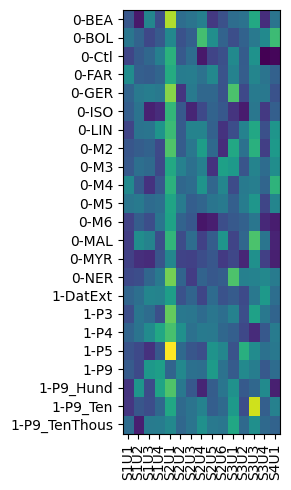

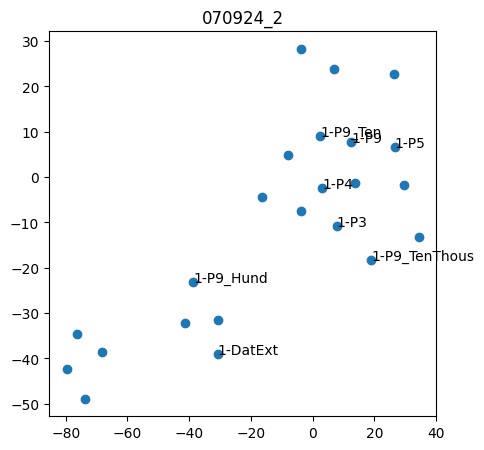

In [2]:
dur_attcond_stim_ensemble_average = []
dur_spa_attcond_stim_ensemble_average = []

for target in range(0,14):
    spa_attcond_betai, _, spa_attcond_ensemble, _,neurons = analyze_betai(yaml_filepath="config/070924_2/sparse-attflow/sparse-attflow-{}.yaml".format(target),
                                                                               cond=True)
    dur_spa_attcond_stim_ensemble_average.append(spa_attcond_ensemble)
    
plot_ensemble([np.mean(dur_spa_attcond_stim_ensemble_average,0)], 
              ["Cond-spa-attflow"], 
              "ALL",
              q_labels=stimuli,
              neurons=neurons,
              section="During")

# ignore the diluted P9
mean_stim_beta = np.array(dur_spa_attcond_stim_ensemble_average)[0].mean(0)
tsne = TSNE(n_components=2, perplexity=7, early_exaggeration=1)
a = tsne.fit_transform(mean_stim_beta)
fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(a[:,0], a[:,1])
for i in range(0, len(a)):
    if "1" in stimuli[i]:
        ax.annotate(stimuli[i], (a[i,0], a[i,1]))
ax.set_title("070924_2")
plt.savefig("plot/2dTSNE_betai_070924_2.pdf", bbox_inches="tight")

/hpc/home/hy190/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/hpc/home/hy190/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/hpc/home/hy190/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/hpc/home/hy190/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


Text(0.5, 1.0, '070924_2 LN')

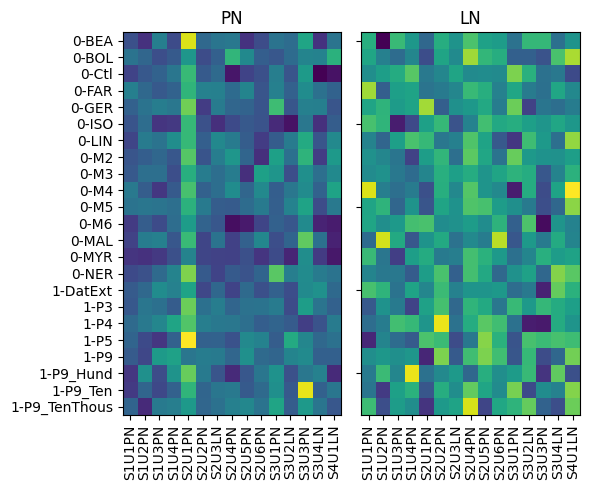

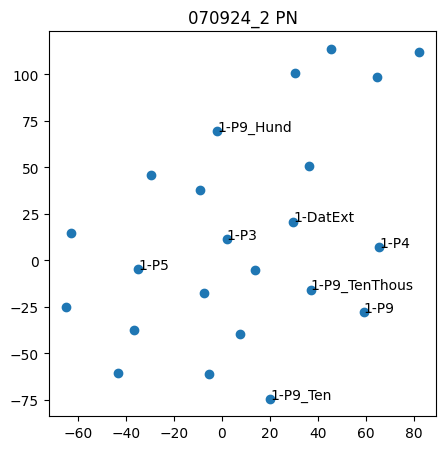

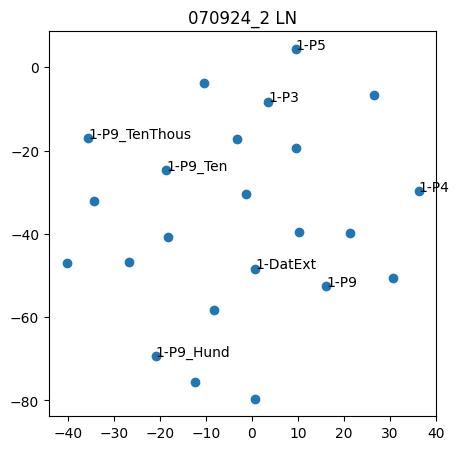

In [3]:
PN_dur_spa_attcond_stim_ensemble_average = []
LN_dur_spa_attcond_stim_ensemble_average = []
PN, LN = [],[]
for target in range(0,14):
    spa_attcond_betai, _, spa_attcond_ensemble, _, neurons = analyze_betai(yaml_filepath="config/070924_2/sparse-attflow/sparse-attflow-{}.yaml".format(target),
                                                                               cond=True, addtype=True)
    if neurons[target][-2:] == "PN":
        PN_dur_spa_attcond_stim_ensemble_average.append(spa_attcond_ensemble)
        PN.append(neurons[target])
    else:
        LN_dur_spa_attcond_stim_ensemble_average.append(spa_attcond_ensemble)
        LN.append(neurons[target])

plot_ensemble([np.mean(PN_dur_spa_attcond_stim_ensemble_average,0), np.mean(LN_dur_spa_attcond_stim_ensemble_average,0)], 
              ["PN", "LN"], 
              "ALL",
              q_labels=stimuli,
              neurons=neurons,
              section="During")
#plt.savefig("betai_condflow.pdf", bbox_inches="tight")

mean_stim_beta = np.array(PN_dur_spa_attcond_stim_ensemble_average).mean(0).mean(0)
mean_stim_beta_dict = {}
tsne = TSNE(n_components=2, perplexity=10, early_exaggeration=1)
a = tsne.fit_transform(mean_stim_beta)
fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(a[:,0], a[:,1])
for i in range(0, len(a)):
    if "1" in stimuli[i]:
        ax.annotate(stimuli[i], (a[i,0], a[i,1]))
ax.set_title("070924_2 PN")

mean_stim_beta = np.array(LN_dur_spa_attcond_stim_ensemble_average).mean(0).mean(0)
mean_stim_beta_dict = {}
tsne = TSNE(n_components=2, perplexity=10, early_exaggeration=1)
a = tsne.fit_transform(mean_stim_beta)
fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(a[:,0], a[:,1])
for i in range(0, len(a)):
    if "1" in stimuli[i]:
        ax.annotate(stimuli[i], (a[i,0], a[i,1]))
ax.set_title("070924_2 LN")
#plt.savefig("plot/2dTSNE_betai_070921.pdf", bbox_inches="tight")

/hpc/home/hy190/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/hpc/home/hy190/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


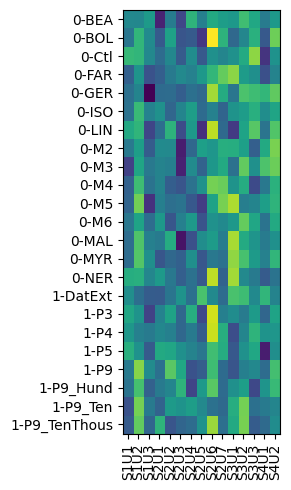

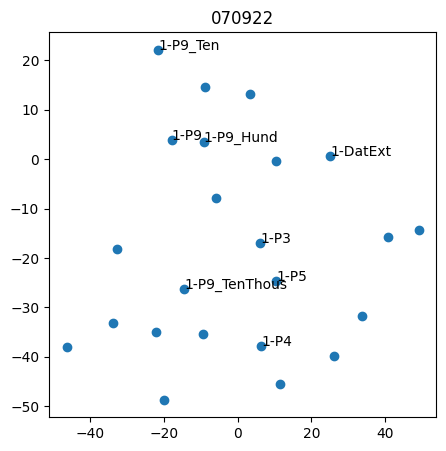

In [4]:
dur_attcond_stim_ensemble_average = []
dur_spa_attcond_stim_ensemble_average = []

for target in range(0,14):
    spa_attcond_betai, _, spa_attcond_ensemble, _,neurons = analyze_betai(yaml_filepath="config/070922/sparse-attflow/sparse-attflow-{}.yaml".format(target),
                                                                               cond=True)
    dur_spa_attcond_stim_ensemble_average.append(spa_attcond_ensemble)
    
plot_ensemble([np.mean(dur_spa_attcond_stim_ensemble_average,0)], 
              ["Cond-spa-attflow"], 
              "ALL",
              q_labels=stimuli,
              neurons=neurons,
              section="During")

# ignore the diluted P9
mean_stim_beta = np.array(dur_spa_attcond_stim_ensemble_average)[0].mean(0)
tsne = TSNE(n_components=2, perplexity=7, early_exaggeration=1)
a = tsne.fit_transform(mean_stim_beta)
fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(a[:,0], a[:,1])
for i in range(0, len(a)):
    if "1" in stimuli[i]:
        ax.annotate(stimuli[i], (a[i,0], a[i,1]))
ax.set_title("070922")
plt.savefig("plot/2dTSNE_betai_070922.pdf", bbox_inches="tight")

/hpc/home/hy190/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/hpc/home/hy190/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/hpc/home/hy190/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/hpc/home/hy190/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


Text(0.5, 1.0, '070922 LN')

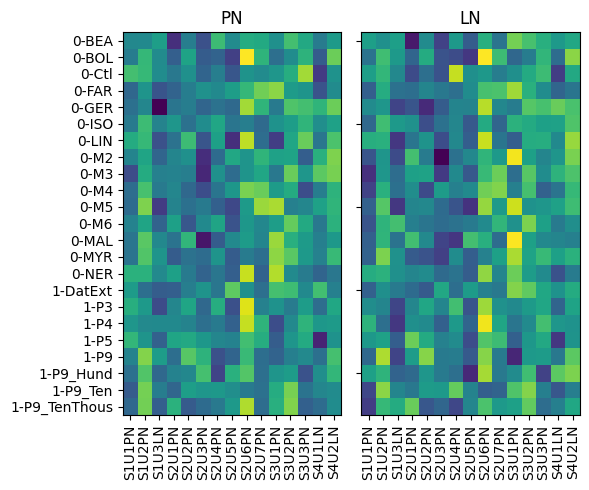

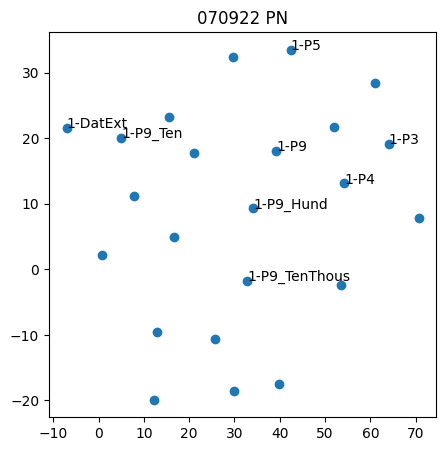

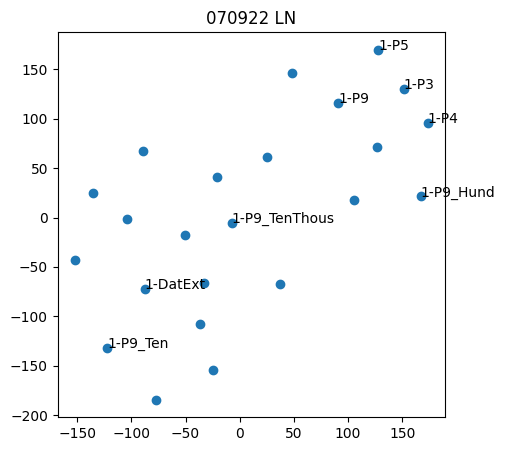

In [5]:
PN_dur_spa_attcond_stim_ensemble_average = []
LN_dur_spa_attcond_stim_ensemble_average = []
PN, LN = [],[]
for target in range(0,14):
    spa_attcond_betai, _, spa_attcond_ensemble, _, neurons = analyze_betai(yaml_filepath="config/070922/sparse-attflow/sparse-attflow-{}.yaml".format(target),
                                                                               cond=True, addtype=True)
    if neurons[target][-2:] == "PN":
        PN_dur_spa_attcond_stim_ensemble_average.append(spa_attcond_ensemble)
        PN.append(neurons[target])
    else:
        LN_dur_spa_attcond_stim_ensemble_average.append(spa_attcond_ensemble)
        LN.append(neurons[target])

plot_ensemble([np.mean(PN_dur_spa_attcond_stim_ensemble_average,0), np.mean(LN_dur_spa_attcond_stim_ensemble_average,0)], 
              ["PN", "LN"], 
              "ALL",
              q_labels=stimuli,
              neurons=neurons,
              section="During")
#plt.savefig("betai_condflow.pdf", bbox_inches="tight")

mean_stim_beta = np.array(PN_dur_spa_attcond_stim_ensemble_average).mean(0).mean(0)
mean_stim_beta_dict = {}
tsne = TSNE(n_components=2, perplexity=10, early_exaggeration=1)
a = tsne.fit_transform(mean_stim_beta)
fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(a[:,0], a[:,1])
for i in range(0, len(a)):
    if "1" in stimuli[i]:
        ax.annotate(stimuli[i], (a[i,0], a[i,1]))
ax.set_title("070922 PN")

mean_stim_beta = np.array(LN_dur_spa_attcond_stim_ensemble_average).mean(0).mean(0)
mean_stim_beta_dict = {}
tsne = TSNE(n_components=2, perplexity=10, early_exaggeration=1)
a = tsne.fit_transform(mean_stim_beta)
fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(a[:,0], a[:,1])
for i in range(0, len(a)):
    if "1" in stimuli[i]:
        ax.annotate(stimuli[i], (a[i,0], a[i,1]))
ax.set_title("070922 LN")
#plt.savefig("plot/2dTSNE_betai_070921.pdf", bbox_inches="tight")

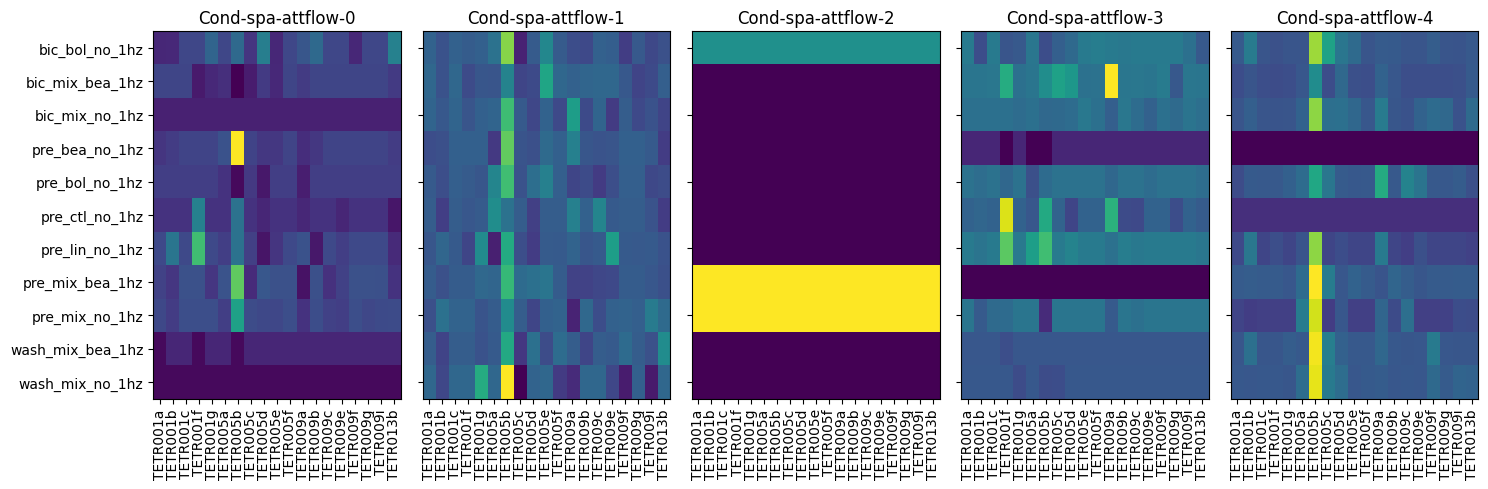

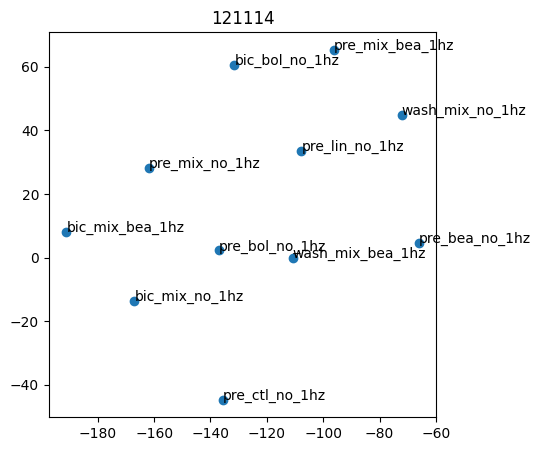

In [6]:
dur_attcond_stim_ensemble_average = []
dur_spa_attcond_stim_ensemble_average = []
stimuli_new = ["bic_bol_no_1hz","bic_mix_bea_1hz","bic_mix_no_1hz","pre_bea_no_1hz",
               "pre_bol_no_1hz","pre_ctl_no_1hz","pre_lin_no_1hz","pre_mix_bea_1hz"	,
               "pre_mix_no_1hz","wash_mix_bea_1hz","wash_mix_no_1hz"]
for target in range(0,14):
    spa_attcond_betai, _, spa_attcond_ensemble, _,neurons = analyze_betai(yaml_filepath="config/121114/sparse-attflow/sparse-attflow-{}.yaml".format(target),
                                                                               cond=True,
                                                                               q=stimuli_new)
    dur_spa_attcond_stim_ensemble_average.append(spa_attcond_ensemble)
    
plot_ensemble([dur_spa_attcond_stim_ensemble_average[0],
               dur_spa_attcond_stim_ensemble_average[1],
               dur_spa_attcond_stim_ensemble_average[2],
               dur_spa_attcond_stim_ensemble_average[3],
               dur_spa_attcond_stim_ensemble_average[4]], 
              ["Cond-spa-attflow-0", "Cond-spa-attflow-1", "Cond-spa-attflow-2", "Cond-spa-attflow-3", "Cond-spa-attflow-4"], 
              "ALL",
              q_labels=stimuli_new,
              neurons=neurons,
              section="During")


mean_stim_beta = np.array(dur_spa_attcond_stim_ensemble_average).mean(0).mean(0)
tsne = TSNE(n_components=2, perplexity=7, early_exaggeration=1)
a = tsne.fit_transform(mean_stim_beta)
fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(a[:,0], a[:,1])
for i in range(0, len(a)):
    ax.annotate(stimuli_new[i], (a[i,0], a[i,1]))
ax.set_title("121114")
plt.show()

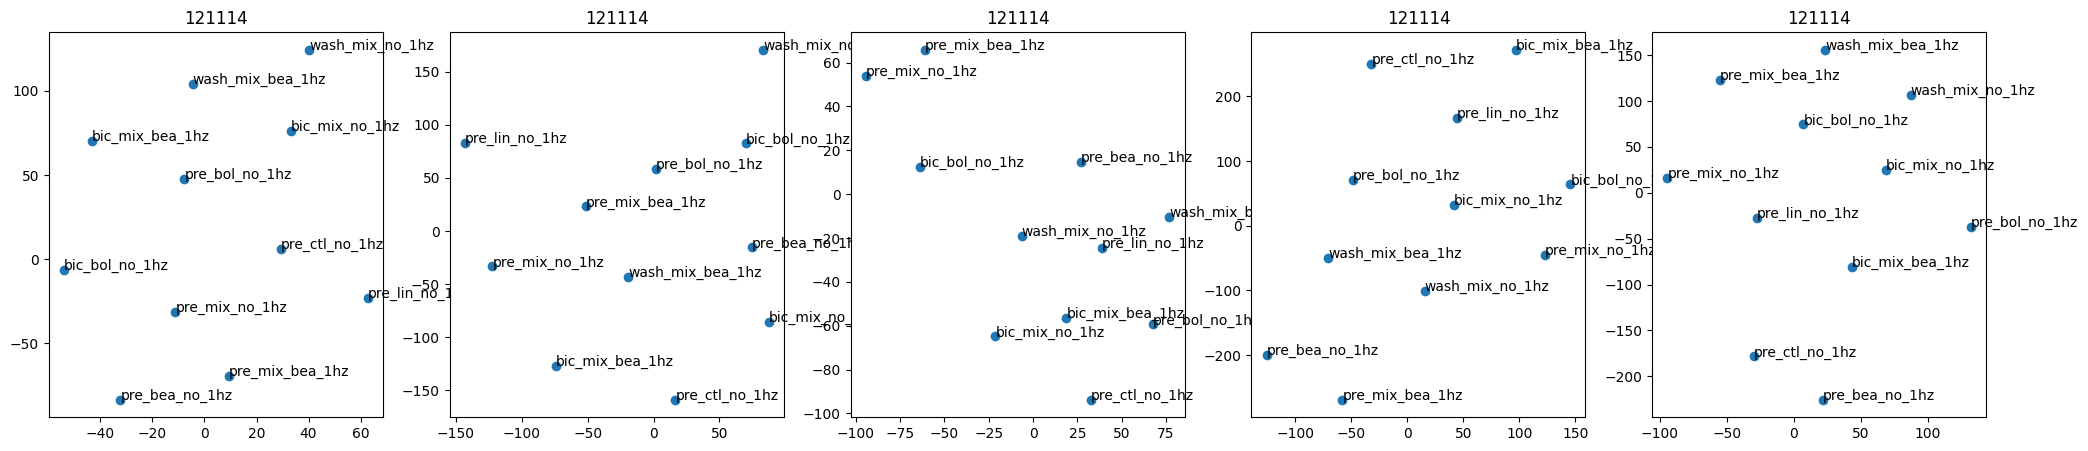

In [12]:
# ignore the diluted P9
plt.figure(figsize=(25,5))
ax=plt.subplot(151)
mean_stim_beta = np.array(dur_spa_attcond_stim_ensemble_average)[0].mean(0)
tsne = TSNE(n_components=2, perplexity=7, early_exaggeration=1)
a = tsne.fit_transform(mean_stim_beta)
ax.scatter(a[:,0], a[:,1])
for i in range(0, len(a)):
    ax.annotate(stimuli_new[i], (a[i,0], a[i,1]))
ax.set_title("121114")

ax=plt.subplot(152)
mean_stim_beta = np.array(dur_spa_attcond_stim_ensemble_average)[1].mean(0)
tsne = TSNE(n_components=2, perplexity=7, early_exaggeration=1)
a = tsne.fit_transform(mean_stim_beta)
ax.scatter(a[:,0], a[:,1])
for i in range(0, len(a)):
    ax.annotate(stimuli_new[i], (a[i,0], a[i,1]))
ax.set_title("121114")

ax=plt.subplot(153)
mean_stim_beta = np.array(dur_spa_attcond_stim_ensemble_average)[2].mean(0)
tsne = TSNE(n_components=2, perplexity=7, early_exaggeration=1)
a = tsne.fit_transform(mean_stim_beta)
ax.scatter(a[:,0], a[:,1])
for i in range(0, len(a)):
    ax.annotate(stimuli_new[i], (a[i,0], a[i,1]))
ax.set_title("121114")

ax=plt.subplot(154)
mean_stim_beta = np.array(dur_spa_attcond_stim_ensemble_average)[3].mean(0)
tsne = TSNE(n_components=2, perplexity=7, early_exaggeration=1)
a = tsne.fit_transform(mean_stim_beta)
ax.scatter(a[:,0], a[:,1])
for i in range(0, len(a)):
    ax.annotate(stimuli_new[i], (a[i,0], a[i,1]))
ax.set_title("121114")

ax=plt.subplot(155)
mean_stim_beta = np.array(dur_spa_attcond_stim_ensemble_average)[4].mean(0)
tsne = TSNE(n_components=2, perplexity=7, early_exaggeration=1)
a = tsne.fit_transform(mean_stim_beta)
ax.scatter(a[:,0], a[:,1])
for i in range(0, len(a)):
    ax.annotate(stimuli_new[i], (a[i,0], a[i,1]))
ax.set_title("121114")
plt.show()

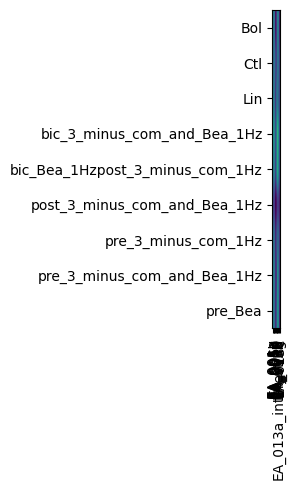

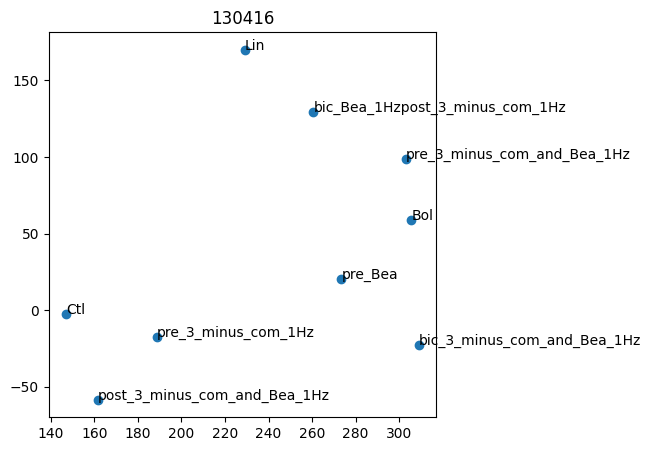

In [7]:
dur_attcond_stim_ensemble_average = []
dur_spa_attcond_stim_ensemble_average = []
stimuli_new = ["Bol","Ctl","Lin","bic_3_minus_com_and_Bea_1Hz","bic_Bea_1Hz"
               "post_3_minus_com_1Hz","post_3_minus_com_and_Bea_1Hz","pre_3_minus_com_1Hz",
               "pre_3_minus_com_and_Bea_1Hz","pre_Bea"]

for target in range(0,10):
    spa_attcond_betai, _, spa_attcond_ensemble, _,neurons = analyze_betai(yaml_filepath="config/130416/sparse-attflow/sparse-attflow-{}.yaml".format(target),
                                                                               cond=True,
                                                                               q=stimuli_new)
    dur_spa_attcond_stim_ensemble_average.append(spa_attcond_ensemble)
    
plot_ensemble([np.mean(dur_spa_attcond_stim_ensemble_average,0)], 
              ["Cond-spa-attflow"], 
              "ALL",
              q_labels=stimuli_new,
              neurons=neurons,
              section="During")

# ignore the diluted P9
mean_stim_beta = np.array(dur_spa_attcond_stim_ensemble_average)[0].mean(0)
tsne = TSNE(n_components=2, perplexity=3, early_exaggeration=1)
a = tsne.fit_transform(mean_stim_beta)
fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(a[:,0], a[:,1])
for i in range(0, len(a)):
    ax.annotate(stimuli_new[i], (a[i,0], a[i,1]))
ax.set_title("130416")
plt.show()

/hpc/home/hy190/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/hpc/home/hy190/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


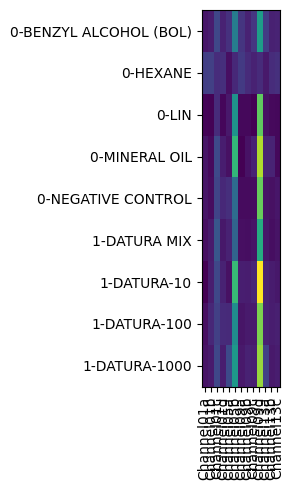

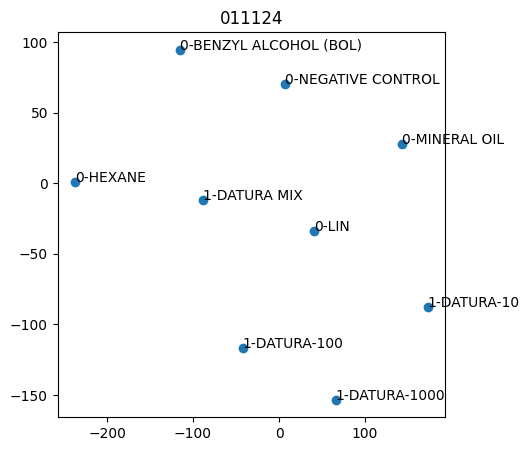

In [19]:
dur_spa_attcond_stim_ensemble_average = []
stimuli = ['0-BENZYL ALCOHOL (BOL)', '0-HEXANE', '0-LIN', '0-MINERAL OIL', '0-NEGATIVE CONTROL', 
           '1-DATURA MIX', '1-DATURA-10', '1-DATURA-100', '1-DATURA-1000']
for target in range(0,13):
    try:
        spa_attcond_betai, _, spa_attcond_ensemble, _, neurons = analyze_betai(yaml_filepath="config/011124/sparse-attflow/sparse-attflow-{}.yaml".format(target),
                                                                                q=stimuli,
                                                                                cond=True)
        dur_spa_attcond_stim_ensemble_average.append(spa_attcond_ensemble)
    except:
        pass

plot_ensemble([np.mean(dur_spa_attcond_stim_ensemble_average,0)], 
              ["Cond-spa-attflow"], 
              "ALL",
              q_labels=stimuli,
              neurons=neurons[:-1],
              section="During")
#plt.savefig("betai_condflow.pdf", bbox_inches="tight")

mean_stim_beta = np.array(dur_spa_attcond_stim_ensemble_average).mean(0).mean(0)
mean_stim_beta_dict = {}
tsne = TSNE(n_components=2, perplexity=7, early_exaggeration=1)
a = tsne.fit_transform(mean_stim_beta)
fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(a[:,0], a[:,1])
for i in range(0, len(a)):
    #if "1" in stimuli[i]:
    ax.annotate(stimuli[i], (a[i,0], a[i,1]))
ax.set_title("011124")
plt.savefig("plot/2dTSNE_betai_011124.pdf", bbox_inches="tight")

In [ ]:
spa_attcond_ensemble[0][0].shape

(14,)

/hpc/home/hy190/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/hpc/home/hy190/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


Text(0.5, 1.0, '12142022, 1000X')

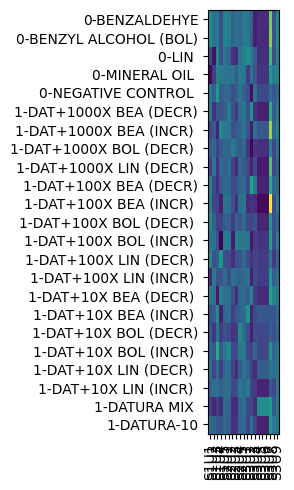

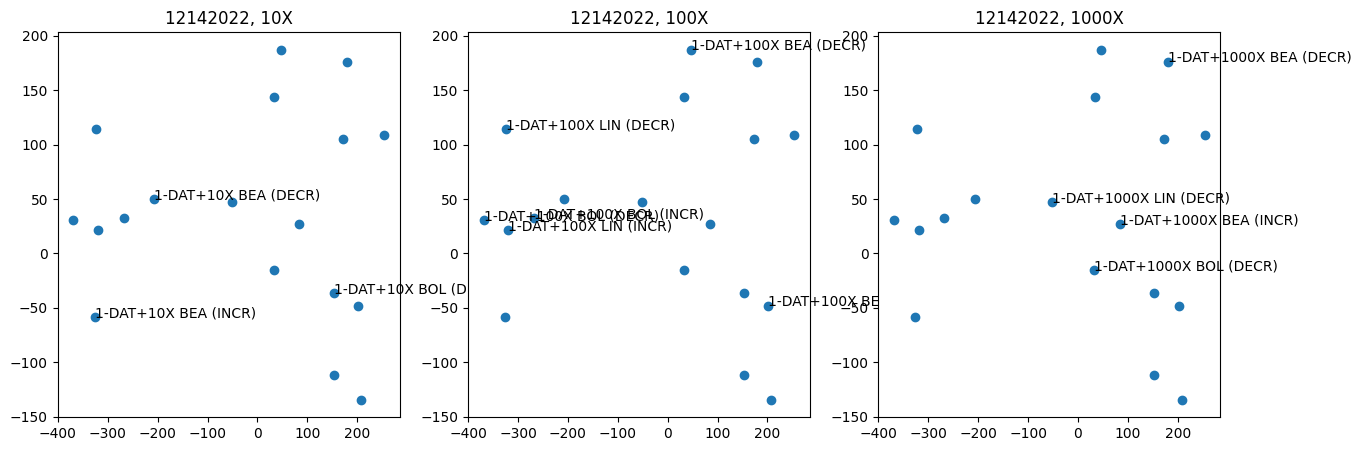

In [15]:
dur_spa_attcond_stim_ensemble_average = []
stimuli = ['0-BENZALDEHYE', '0-BENZYL ALCOHOL (BOL)', '0-LIN ', '0-MINERAL OIL ', '0-NEGATIVE CONTROL ', 
           '1-DAT+1000X BEA (DECR)', '1-DAT+1000X BEA (INCR) ', '1-DAT+1000X BOL (DECR) ', '1-DAT+1000X LIN (DECR) ', 
           '1-DAT+100X BEA (DECR)', '1-DAT+100X BEA (INCR) ', '1-DAT+100X BOL (DECR) ', '1-DAT+100X BOL (INCR) ', 
           '1-DAT+100X LIN (DECR) ', '1-DAT+100X LIN (INCR) ', '1-DAT+10X BEA (DECR) ', '1-DAT+10X BEA (INCR) ', 
           '1-DAT+10X BOL (DECR)', '1-DAT+10X BOL (INCR) ', '1-DAT+10X LIN (DECR) ', '1-DAT+10X LIN (INCR) ', 
           '1-DATURA MIX ', '1-DATURA-10']
for target in range(0,19):
    #try:
    spa_attcond_betai, _, spa_attcond_ensemble, _, neurons = analyze_betai(yaml_filepath="config/12142022/sparse-attflow/sparse-attflow-{}.yaml".format(target),
                                                                                q=stimuli,
                                                                                cond=True)
    dur_spa_attcond_stim_ensemble_average.append(spa_attcond_ensemble)
    #except:
    #    pass

plot_ensemble([np.mean(dur_spa_attcond_stim_ensemble_average,0)], 
              ["Cond-spa-attflow"], 
              "ALL",
              q_labels=stimuli,
              neurons=neurons,
              section="During")
#plt.savefig("betai_condflow.pdf", bbox_inches="tight")
stim_sort = np.argsort(stimuli)
mean_stim_beta = np.array(dur_spa_attcond_stim_ensemble_average).mean(0).mean(0)[stim_sort][5:]
mean_stim_beta_dict = {}
tsne = TSNE(n_components=2, perplexity=3,)# early_exaggeration=1)
a = tsne.fit_transform(mean_stim_beta)
fig, axes = plt.subplots(figsize=(15,5),ncols=3)
axes[0].scatter(a[:,0], a[:,1])
for i in range(0, len(a)):
    if "1" in stimuli[i] and "100X" not in stimuli[i] and "1000X" not in stimuli[i]:
        axes[0].annotate(stimuli[i], (a[i,0], a[i,1]))
axes[0].set_title("12142022, 10X")

axes[1].scatter(a[:,0], a[:,1])
for i in range(0, len(a)):
    if "1" in stimuli[i] and "100X" in stimuli[i]:
        axes[1].annotate(stimuli[i], (a[i,0], a[i,1]))
axes[1].set_title("12142022, 100X")
axes[2].scatter(a[:,0], a[:,1])
for i in range(0, len(a)):
    if "1" in stimuli[i] and "1000X" in stimuli[i]:
        axes[2].annotate(stimuli[i], (a[i,0], a[i,1]))
axes[2].set_title("12142022, 1000X")
#plt.savefig("plot/2dTSNE_betai_12142022.pdf", bbox_inches="tight")

([<matplotlib.axis.XTick at 0x7f68c85d04f0>,
 [Text(1, 0, '10X'), Text(2, 0, '100X'), Text(3, 0, '1000X')])

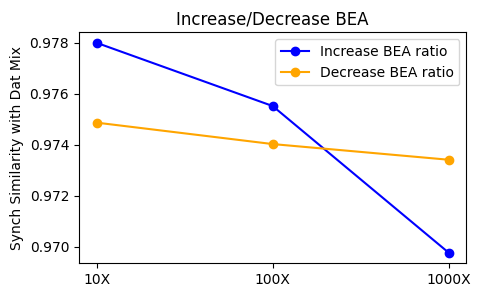

In [95]:
dist = {}
for j in range(5):
    mean_betai = np.array(dur_spa_attcond_stim_ensemble_average).mean(0)[j]
    dat_mix = mean_betai[np.where(np.array(stimuli)[stim_sort] == "1-DATURA MIX ")]
    for i,v in enumerate(mean_betai):
        #if "DECR" not in np.array(stimuli)[stim_sort][i] and "1" in np.array(stimuli)[stim_sort][i]:
        sim = np.dot(dat_mix.flatten(),v.flatten())
        sim /= (np.linalg.norm(dat_mix)*np.linalg.norm(v))
        if np.array(stimuli)[stim_sort][i] not in dist:
            dist[np.array(stimuli)[stim_sort][i]] = []
        dist[np.array(stimuli)[stim_sort][i]].append(sim)
dist = dict(sorted(dist.items(), key=lambda item: item[1]))

plt.figure(figsize=(5,3))
y = [dist['1-DAT+10X BEA (INCR) '], dist['1-DAT+100X BEA (INCR) '], dist['1-DAT+1000X BEA (INCR) ']]
plt.plot([1,2,3], np.mean(y,1), marker="o", c="blue")

y = [dist['1-DAT+10X BEA (DECR) '], dist['1-DAT+100X BEA (DECR)'], dist['1-DAT+1000X BEA (DECR)']]
plt.plot([1,2,3], np.mean(y,1), marker="o",c="orange")

plt.title("Increase/Decrease BEA")
plt.ylabel("Synch Similarity with Dat Mix")
plt.legend(["Increase BEA ratio", "Decrease BEA ratio"])
plt.xticks([1,2,3], ["10X", "100X", "1000X"])

([<matplotlib.axis.XTick at 0x7f688c5828e0>,
 [Text(1, 0, '10X'), Text(2, 0, '100X')])

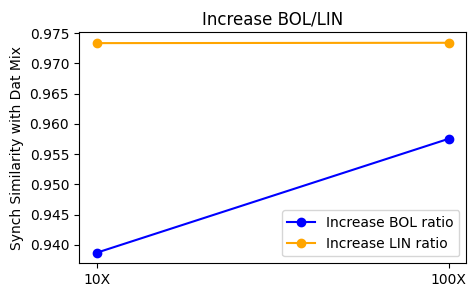

In [103]:
dist = {}
for j in range(5):
    mean_betai = np.array(dur_spa_attcond_stim_ensemble_average).mean(0)[j]
    dat_mix = mean_betai[np.where(np.array(stimuli)[stim_sort] == "1-DATURA MIX ")]
    for i,v in enumerate(mean_betai):
        #if "DECR" not in np.array(stimuli)[stim_sort][i] and "1" in np.array(stimuli)[stim_sort][i]:
        sim = np.dot(dat_mix.flatten(),v.flatten())
        sim /= (np.linalg.norm(dat_mix)*np.linalg.norm(v))
        if np.array(stimuli)[stim_sort][i] not in dist:
            dist[np.array(stimuli)[stim_sort][i]] = []
        dist[np.array(stimuli)[stim_sort][i]].append(sim)
dist = dict(sorted(dist.items(), key=lambda item: item[1]))

plt.figure(figsize=(5,3))
y = [dist['1-DAT+10X BOL (INCR) '], dist['1-DAT+100X BOL (INCR) '], ]#dist['1-DAT+1000X BEA (INCR) ']]
plt.plot([1,2], np.mean(y,1), marker="o", c="blue")
 
y = [dist['1-DAT+10X LIN (INCR) '], dist['1-DAT+100X LIN (INCR) '],]# dist['1-DAT+1000X BEA (DECR)']]
plt.plot([1,2], np.mean(y,1), marker="o",c="orange")

plt.title("Increase BOL/LIN")
plt.ylabel("Synch Similarity with Dat Mix")
plt.legend(["Increase BOL ratio", "Increase LIN ratio"])
plt.xticks([1,2], ["10X", "100X"])

([<matplotlib.axis.XTick at 0x7f68c85400d0>,
 [Text(1, 0, '10X'), Text(2, 0, '100X'), Text(3, 0, '1000X')])

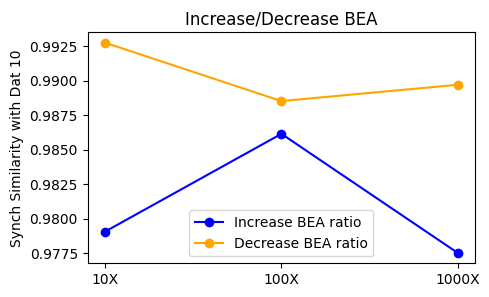

In [96]:
dist = {}
for j in range(5):
    mean_betai = np.array(dur_spa_attcond_stim_ensemble_average).mean(0)[j]
    dat_mix = mean_betai[np.where(np.array(stimuli)[stim_sort] == "1-DATURA-10")]
    for i,v in enumerate(mean_betai):
        #if "DECR" not in np.array(stimuli)[stim_sort][i] and "1" in np.array(stimuli)[stim_sort][i]:
        sim = np.dot(dat_mix.flatten(),v.flatten())
        sim /= (np.linalg.norm(dat_mix)*np.linalg.norm(v))
        if np.array(stimuli)[stim_sort][i] not in dist:
            dist[np.array(stimuli)[stim_sort][i]] = []
        dist[np.array(stimuli)[stim_sort][i]].append(sim)
dist = dict(sorted(dist.items(), key=lambda item: item[1]))

plt.figure(figsize=(5,3))
y = [dist['1-DAT+10X BEA (INCR) '], dist['1-DAT+100X BEA (INCR) '], dist['1-DAT+1000X BEA (INCR) ']]
plt.plot([1,2,3], np.mean(y,1), marker="o", c="blue")

y = [dist['1-DAT+10X BEA (DECR) '], dist['1-DAT+100X BEA (DECR)'], dist['1-DAT+1000X BEA (DECR)']]
plt.plot([1,2,3], np.mean(y,1), marker="o",c="orange")

plt.title("Increase/Decrease BEA")
plt.ylabel("Synch Similarity with Dat 10")
plt.legend(["Increase BEA ratio", "Decrease BEA ratio"])
plt.xticks([1,2,3], ["10X", "100X", "1000X"])

([<matplotlib.axis.XTick at 0x7f68c84c5be0>,
 [Text(1, 0, '10X'), Text(2, 0, '100X'), Text(3, 0, '1000X')])

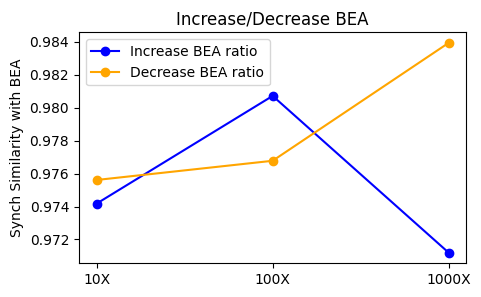

In [97]:
dist = {}
for j in range(5):
    mean_betai = np.array(dur_spa_attcond_stim_ensemble_average).mean(0)[j]
    dat_mix = mean_betai[np.where(np.array(stimuli)[stim_sort] == "0-BENZALDEHYE")]
    for i,v in enumerate(mean_betai):
        #if "DECR" not in np.array(stimuli)[stim_sort][i] and "1" in np.array(stimuli)[stim_sort][i]:
        sim = np.dot(dat_mix.flatten(),v.flatten())
        sim /= (np.linalg.norm(dat_mix)*np.linalg.norm(v))
        if np.array(stimuli)[stim_sort][i] not in dist:
            dist[np.array(stimuli)[stim_sort][i]] = []
        dist[np.array(stimuli)[stim_sort][i]].append(sim)
dist = dict(sorted(dist.items(), key=lambda item: item[1]))

plt.figure(figsize=(5,3))
y = [dist['1-DAT+10X BEA (INCR) '], dist['1-DAT+100X BEA (INCR) '], dist['1-DAT+1000X BEA (INCR) ']]
plt.plot([1,2,3], np.mean(y,1), marker="o", c="blue")

y = [dist['1-DAT+10X BEA (DECR) '], dist['1-DAT+100X BEA (DECR)'], dist['1-DAT+1000X BEA (DECR)']]
plt.plot([1,2,3], np.mean(y,1), marker="o",c="orange")

plt.title("Increase/Decrease BEA")
plt.ylabel("Synch Similarity with BEA")
plt.legend(["Increase BEA ratio", "Decrease BEA ratio"])
plt.xticks([1,2,3], ["10X", "100X", "1000X"])

In [76]:
dist = {}
for j in range(5):
    mean_betai = np.array(dur_spa_attcond_stim_ensemble_average).mean(0)[j]
    dat_mix = mean_betai[np.where(np.array(stimuli)[stim_sort] == "0-BENZALDEHYE")]
    for i,v in enumerate(mean_betai):
        #if "DECR" not in np.array(stimuli)[stim_sort][i] and "1" in np.array(stimuli)[stim_sort][i]:
        sim = np.dot(dat_mix.flatten(),v.flatten())
        sim /= (np.linalg.norm(dat_mix)*np.linalg.norm(v))
        if np.array(stimuli)[stim_sort][i] not in dist:
            dist[np.array(stimuli)[stim_sort][i]] = []
        dist[np.array(stimuli)[stim_sort][i]].append(sim)
dist = dict(sorted(dist.items(), key=lambda item: item[1]))
dist

{'1-DATURA MIX ': [0.9709541096836022,
  0.9329249982807989,
  0.9476897277096414,
  0.9994723982872925,
  0.9892211240935899],
 '0-LIN ': [0.9785544538055537,
  0.9548569794004051,
  0.9627649993485234,
  0.9994623856551235,
  0.9946514660776258],
 '1-DAT+10X BOL (INCR) ': [0.9809285732821237,
  0.9361143871093985,
  0.8670355850869219,
  0.9998280281201426,
  0.9929933942261052],
 '1-DAT+1000X BEA (INCR) ': [0.9839653924809749,
  0.9527644576214032,
  0.9277652402324602,
  0.9991429745270441,
  0.9923286128697097],
 '1-DAT+10X LIN (DECR) ': [0.9842995961483622,
  0.9676036609482095,
  0.948850771737909,
  0.9996820464205493,
  0.9908850434708986],
 '1-DAT+100X BOL (INCR) ': [0.9847725216404294,
  0.9689032178809376,
  0.9426056620467941,
  0.9987872493731386,
  0.9925709549406464],
 '1-DAT+10X LIN (INCR) ': [0.9862291704623656,
  0.9618815852211174,
  0.9459829275483818,
  0.999609821528759,
  0.9962622768604915],
 '1-DAT+100X BOL (DECR) ': [0.987281036754779,
  0.966905775622983,
  

([<matplotlib.axis.XTick at 0x7f68d0221190>,
 [Text(1, 0, '10X'), Text(2, 0, '100X'), Text(3, 0, '1000X')])

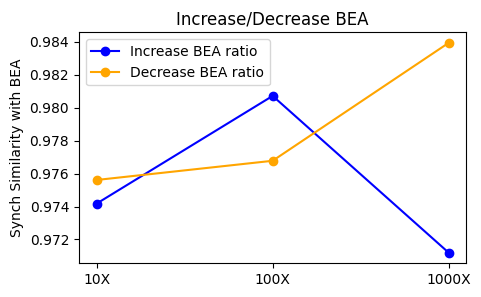

In [77]:
plt.figure(figsize=(5,3))
y = [dist['1-DAT+10X BEA (INCR) '], dist['1-DAT+100X BEA (INCR) '], dist['1-DAT+1000X BEA (INCR) ']]
plt.plot([1,2,3], np.mean(y,1), marker="o", c="blue")

y = [dist['1-DAT+10X BEA (DECR) '], dist['1-DAT+100X BEA (DECR)'], dist['1-DAT+1000X BEA (DECR)']]
plt.plot([1,2,3], np.mean(y,1), marker="o",c="orange")

plt.title("Increase/Decrease BEA")
plt.ylabel("Synch Similarity with BEA")
plt.legend(["Increase BEA ratio", "Decrease BEA ratio"])
plt.xticks([1,2,3], ["10X", "100X", "1000X"])